In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [67]:
df=pd.read_csv('mushroom.csv')

In [68]:
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [69]:
df.columns

Index(['p', 'x', 's', 'n', 't', 'p.1', 'f', 'c', 'n.1', 'k', 'e', 'e.1', 's.1',
       's.2', 'w', 'w.1', 'p.2', 'w.2', 'o', 'p.3', 'k.1', 's.3', 'u'],
      dtype='object')

In [70]:
df.shape

(8123, 23)

In [71]:
df.dtypes

p      object
x      object
s      object
n      object
t      object
p.1    object
f      object
c      object
n.1    object
k      object
e      object
e.1    object
s.1    object
s.2    object
w      object
w.1    object
p.2    object
w.2    object
o      object
p.3    object
k.1    object
s.3    object
u      object
dtype: object

In [72]:
df.info

<bound method DataFrame.info of       p  x  s  n  t p.1  f  c n.1  k  ... s.2  w w.1 p.2 w.2  o p.3 k.1 s.3  u
0     e  x  s  y  t   a  f  c   b  k  ...   s  w   w   p   w  o   p   n   n  g
1     e  b  s  w  t   l  f  c   b  n  ...   s  w   w   p   w  o   p   n   n  m
2     p  x  y  w  t   p  f  c   n  n  ...   s  w   w   p   w  o   p   k   s  u
3     e  x  s  g  f   n  f  w   b  k  ...   s  w   w   p   w  o   e   n   a  g
4     e  x  y  y  t   a  f  c   b  n  ...   s  w   w   p   w  o   p   k   n  g
...  .. .. .. .. ..  .. .. ..  .. ..  ...  .. ..  ..  ..  .. ..  ..  ..  .. ..
8118  e  k  s  n  f   n  a  c   b  y  ...   s  o   o   p   o  o   p   b   c  l
8119  e  x  s  n  f   n  a  c   b  y  ...   s  o   o   p   n  o   p   b   v  l
8120  e  f  s  n  f   n  a  c   b  n  ...   s  o   o   p   o  o   p   b   c  l
8121  p  k  y  n  f   y  f  c   n  b  ...   k  w   w   p   w  o   e   w   v  l
8122  e  x  s  n  f   n  a  c   b  y  ...   s  o   o   p   o  o   p   o   c  l

[8123 rows x 23 col

In [73]:
df.isnull().sum()

p      0
x      0
s      0
n      0
t      0
p.1    0
f      0
c      0
n.1    0
k      0
e      0
e.1    0
s.1    0
s.2    0
w      0
w.1    0
p.2    0
w.2    0
o      0
p.3    0
k.1    0
s.3    0
u      0
dtype: int64

In [74]:
columns=df.columns

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label=le.fit_transform(df[columns])
le.classes_

ValueError: bad input shape (8123, 23)

In [76]:
df.loc[:, 'NumericalClass']=0

In [77]:
df.loc[df.p =='e', 'NumericalClass']=0
df.loc[df.p =='p', 'NumericalClass']=1

In [78]:
feature_names= ['p', 'x', 's', 'n', 't', 'p.1', 'f', 'c', 'n.1', 'k', 'e', 'e.1', 's.1',
       's.2', 'w', 'w.1', 'p.2', 'w.2', 'o', 'p.3', 'k.1', 's.3', 'u']

In [79]:
target='NumericalClass'

In [80]:
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u,NumericalClass
0,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,0
1,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,0
2,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,1
3,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,0
4,e,x,y,y,t,a,f,c,b,n,...,w,w,p,w,o,p,k,n,g,0


In [81]:
df_new=df.drop('p',axis='columns')
df_new

,x,s,n,t,p.1,f,c,n.1,k,e,...,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u,NumericalClass
0,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,0
1,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,0
2,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,1
3,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,0
4,x,y,y,t,a,f,c,b,n,e,...,w,w,p,w,o,p,k,n,g,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,0
8119,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,0
8120,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,0
8121,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,1


In [82]:
df_new.shape

(8123, 23)

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new=df_new.apply(le.fit_transform)

In [84]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
df_new=ohe.fit_transform(df_new)

In [85]:
x=df_new[:,0:23]

In [86]:
x.shape

(8123, 23)

In [87]:
y=df_new[:,-1]

In [88]:
y.shape

(8123,)

In [89]:
y=y.reshape(-1,1)

In [90]:
y.shape

(8123, 1)

In [91]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=9,stratify=y)

In [92]:
print(x_train.shape,x_test.shape)

(5686, 23) (2437, 23)


In [93]:
print(y_train.shape,y_test.shape)

(5686, 1) (2437, 1)


In [94]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [95]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [96]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score=  0.8867459991793188


Cross_Val_Score=  0.7957837238470907


roc_auc_score=  0.885164042216003


classification_report
               precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      1262
         1.0       0.92      0.84      0.88      1175

    accuracy                           0.89      2437
   macro avg       0.89      0.89      0.89      2437
weighted avg       0.89      0.89      0.89      2437


[[1173   89]
 [ 187  988]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf'

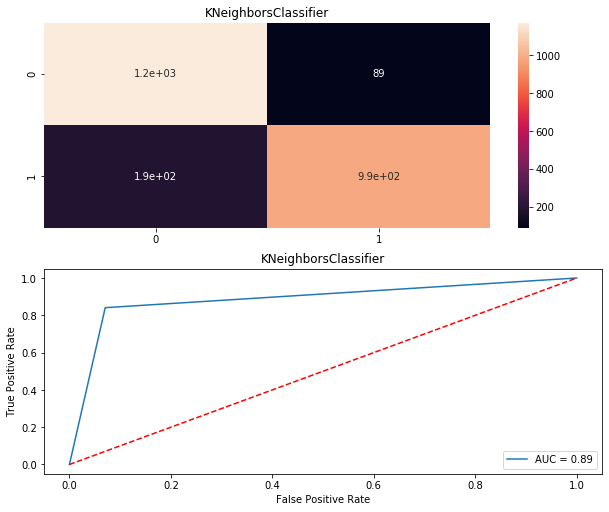

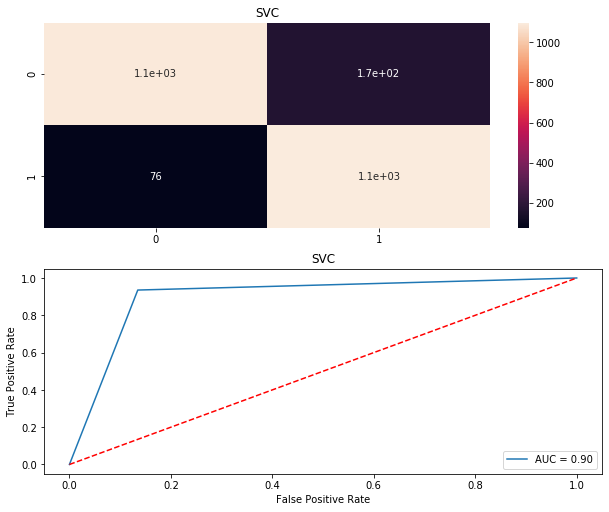

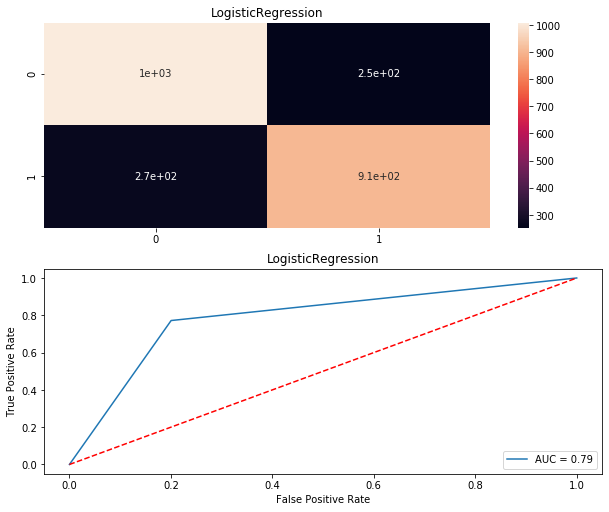

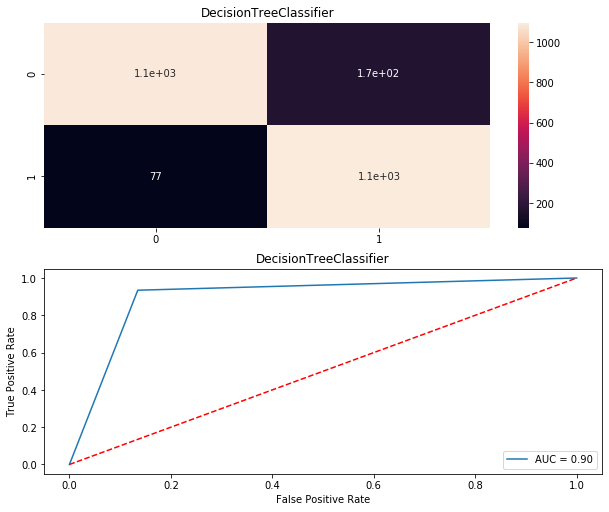

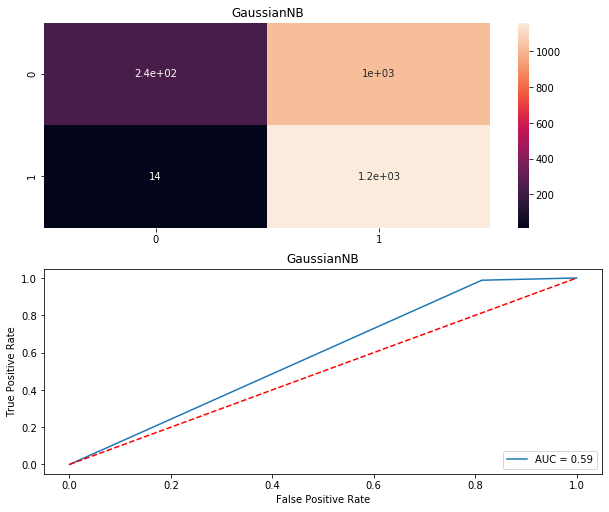

In [98]:
Model = []
score = []
cvs = []
rocscore =[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score= ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score= ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('roc_auc_score= ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre), end = "\n\n")
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [99]:
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs, 'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,88.674600,79.578372,88.516404
1,SVC,89.905622,83.062640,90.030617
2,LogisticRegression,78.621256,75.653739,78.571973
3,DecisionTreeClassifier,89.864588,83.666088,89.988064
4,GaussianNB,57.324579,56.550573,58.754493


In [101]:
from sklearn.externals import joblib

In [102]:
joblib.dump(SV,'Model_Mushroom.csv')

['Model_Mushroom.csv']

In [104]:
model=joblib.load('Model_Mushroom.csv')

In [105]:
model.predict(x_test)

array([0., 1., 1., ..., 1., 1., 1.])